In [51]:
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('display.float_format', '{:.2f}'.format)


df = pd.read_csv("dataset/output.csv")
# df['lat']=(df['lat']-df['lat'].min())/(df['lat'].max()-df['lat'].min())
# df['lng']=(df['lng']-df['lng'].min())/(df['lng'].max()-df['lng'].min())

z_scores = np.abs(stats.zscore(df['lng']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

z_scores = np.abs(stats.zscore(df['lat']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

df.head(5)

,Tenure,Sqft,Price,Transactions,Township,Bungalow,ClusterHouse,SemiDetached,TerracedHouse,Condominium,Flat,Hostel,TownHouse,lat,lng
0,FREEHOLD,312.34,765000.00,1,BARAT_DAYA,0,0,0,0,0,0,1,0,5.41,100.33
1,FREEHOLD,443.46,883440.00,36,BARAT_DAYA,0,0,0,0,0,1,1,0,5.29,100.27
2,FREEHOLD,427.70,519000.00,1,SEBERANG_PERAI_SELATAN,0,0,0,0,0,0,1,0,5.27,100.50
3,FREEHOLD,426.96,470500.00,4,SEBERANG_PERAI_SELATAN,0,0,0,0,0,0,1,0,5.27,100.51
4,FREEHOLD,295.27,838800.00,1,SEBERANG_PERAI_SELATAN,0,0,0,0,0,0,1,0,5.18,100.49


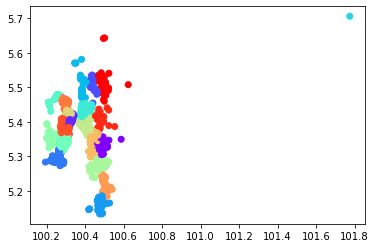

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x = df.iloc[:, -2:] # 1t for rows and second for columns
kmeans = KMeans(20)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['lng'],data_with_clusters['lat'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [42]:
latlong = {}
housePrice = {}
salary = {}

def salaryPrice(price):
    price *= 0.9
    price *= ((1.03)**30)
    salary = price / 30 / 12  * 3
    return salary

for i in range(20):
    lat = df.iloc[np.argwhere(identified_clusters == i).ravel()]['lat'].median()
    lng = df.iloc[np.argwhere(identified_clusters == i).ravel()]['lng'].median()
    price = df.iloc[np.argwhere(identified_clusters == i).ravel()]['Price'].median()
    sal = salaryPrice(price)

    latlong[i] = (lat, lng)
    housePrice[i] = price
    salary[i] = sal

{0: 4733.161818819842,
 1: 5188.273532167903,
 2: 5329.248936494599,
 3: 8829.167238952396,
 4: 3458.8490214452686,
 5: 3367.8266787756565,
 6: 2457.603252079533,
 7: 5188.273532167903,
 8: 10467.569407005418,
 9: 6462.586329542476,
 10: 6189.519301533639,
 11: 5006.228846828678,
 12: 4642.139476150229,
 13: 18204.468533922467,
 14: 5579.6696056472365,
 15: 3458.8490214452686,
 16: 14636.392701273664,
 17: 5582.709751892401,
 18: 4819.633044355973,
 19: 4150.618825734322}

In [56]:
df = pd.DataFrame([latlong, housePrice, salary]).T
df.columns = ['latlng', 'price', 'salary']
df.to_csv("salary.csv", index=False)